# Recognising NRs


In [1]:
import sys
import os
basef = "/mnt/data/Anastasia/"
wdirs = ["/mnt/data/Anastasia/18_11_29_pd23_11_div6_25Hzsqwave/",
         basef+"18_12_10_pd3_12_div7_WIS_NR-BeRST",
         basef+"18_12_12_pd7_12_div5_WIS_NR-BeRST",
         basef+"18_12_12_pd7_12_div5_WIS_NR-BeRST_DM590",
         basef+"19_01_30_pd25_01_div5_NR_BeRST",
         basef+"19_02_05_pd1_02_div4_NR_BeRST"
]

dfiles = []
for dirt in wdirs:
    basedir = dirt
    files = os.listdir(basedir)
    if dirt[-1] != '/':
        dirt = dirt+'/'
    for f in files:
        if f[-4:]=='.tif': 
            try:
                i = int(f[-5])
                dfiles.append(dirt+f)
            except:
                pass

            
     
               
  
            
#dfiles = dfiles[4:8]

print(len(dfiles))
print(dfiles)


35
['/mnt/data/Anastasia/18_11_29_pd23_11_div6_25Hzsqwave/cell2_3.tif', '/mnt/data/Anastasia/18_11_29_pd23_11_div6_25Hzsqwave/cell1_1.tif', '/mnt/data/Anastasia/18_11_29_pd23_11_div6_25Hzsqwave/cell3_5.tif', '/mnt/data/Anastasia/18_11_29_pd23_11_div6_25Hzsqwave/cell4_7.tif', '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell5_10.tif', '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell2_3.tif', '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell1_1.tif', '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell4_8.tif', '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell7_14.tif', '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell6_12.tif', '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell3_5.tif', '/mnt/data/Anastasia/18_12_12_pd7_12_div5_WIS_NR-BeRST/cell1_1.tif', '/mnt/data/Anastasia/18_12_12_pd7_12_div5_WIS_NR-BeRST/cell3_7.tif', '/mnt/data/Anastasia/18_12_12_pd7_12_div5_WIS_NR-BeRST/cell2_4.tif', '/mnt/data/Anastasia/18_12_12_p

In [2]:
sys.path.append("/export/home1/users/bssn/serna/GitIBENS/Nanorods")

In [3]:
from numpy import *
from matplotlib.pylab import *
import scipy.optimize as opt
import pickle
from scipy.optimize import minimize,least_squares
from scipy.stats import linregress

%matplotlib inline

In [4]:
from signal_analysis.core import dblgausfit,dblgaussd

In [5]:
def bimod(x):
    m1 = mean(x)
    m2 = std(x)
    m3 = mean((x-m1)**3)/m2**3
    m4 = mean((x-m1)**4)/m2**4
    return((m3**2+1)/m4)

In [44]:
#with open('/mnt/data/Anastasia/RecognisingNRs_allcells.pkl','rb') as f:
#    imsk,nwdirs,dfilesF,dgps,ampst,idx0,xds,xde,xden,Des,Dep = pickle.load(f)

with open('/mnt/data/Anastasia/full_statsB.pkl','rb') as f:
    imsk,nwdirs,dgps,ampst,idx0,xds,xde,xden,Des,Dep,tmark = pickle.load(f)

with open('/mnt/data/Anastasia/glass_statsB.pkl','rb') as f:
    Gimsk,Gnwdirs,Gdgps,Gampst,Gidx0,Gxds,Gxde,Gxden,GDes,GDep,Gtmark = pickle.load(f)

with open('/mnt/data/Anastasia/selected_statsB.pkl','rb') as f:
    Simsk,Snwdirs,Sdgps,Sampst,Sidx0,Sxds,Sxde,Sxden,SDes,SDep,Stmark = pickle.load(f)


In [123]:
dfilesF = []
driftcorrected = True
for i,dirt in enumerate(nwdirs):
    basedir = dirt
    files = os.listdir(basedir)
    dfiles = []
    if driftcorrected:
        for f in files:
            if f[-4:]=='.npy'and f[:4]=='posh' and f[-6:-4]=='DC': dfiles.append(basedir+f)
    else:
        for f in files:
            if f[-4:]=='.npy'and f[:4]=='posh' and f[-6:-4]!='DC': dfiles.append(basedir+f)
    dfiles.sort()
    dfilesF.extend(dfiles)
dfiles = dfilesF

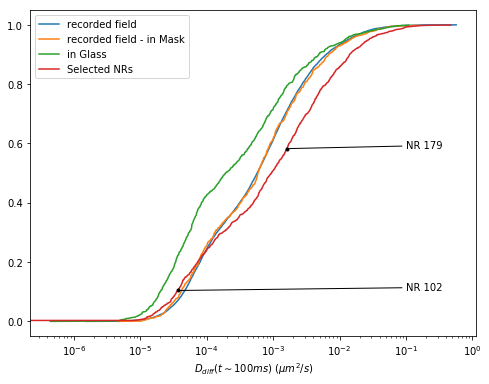

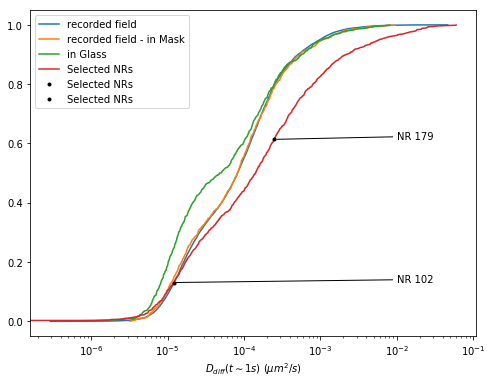

In [70]:
figure(figsize=(8,6))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
zt = abs((dgps[:,3]-dgps[:,5])/s1)
#zt = 1.0*ampst[:,0]/ampst[:,1]
yt = 1.0*Dep[:,0]
xt = sqrt(tmark[:,2]*1.0)
xt = tmark[:,1]*1.0
sel = (xt>0)*(yt>0)*(abs(zt)<20)*(abs(zt)>3)

d = yt[sel]
d.sort()
plot(d,arange(len(d))/len(d),label = 'recorded field')

yt = yt[sel]
d = yt[imsk[idx0[sel]] == 1]
d.sort()
plot(d,arange(len(d))/len(d),label = 'recorded field - in Mask')

s1 = column_stack((Gdgps[:,6],Gdgps[:,4])).max(axis=1)
zt = abs((Gdgps[:,3]-Gdgps[:,5])/s1)
#zt = 1.0*ampst[:,0]/ampst[:,1]
yt = 1.0*GDep[:,0]
xt = sqrt(Gtmark[:,2]*1.0)
xt = Gtmark[:,1]*1.0
sel = (xt>0)*(yt>0)*(abs(zt)<20)*(abs(zt)>3)

d = yt[sel]
d.sort()
plot(d,arange(len(d))/len(d),label='in Glass')

yt = 1.0*SDep[:,0]
d = yt
d.sort()
plot(d,arange(len(d))/len(d),label='Selected NRs')

i = 103
ies = [102,179]

for i in ies:
    yt = 1.0*SDep[:,0]
    d = yt
    ssd = d.argsort()#[i]
    dx = d[i]
    dy = arange(len(d))[d[ssd]==dx]/len(d)
    plot(dx,dy,'k.')
    annotate("NR "+str(i), arrowprops=dict(arrowstyle='-'),xy =(dx*1.015,dy),xytext = (1e-1,dy))



xscale("log")
legend()
xlabel("$D_{diff} (t\sim 100 ms)$ ($\mu m^2/s$)")
savefig("DistD0.png")
figure(figsize=(8,6))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
zt = abs((dgps[:,3]-dgps[:,5])/s1)
#zt = 1.0*ampst[:,0]/ampst[:,1]
yt = 1.0*Dep[:,1]
xt = sqrt(tmark[:,2]*1.0)
xt = tmark[:,1]*1.0
sel = (xt>0)*(yt>0)*(abs(zt)<20)*(abs(zt)>3)

d = yt[sel]
d.sort()
plot(d,arange(len(d))/len(d),label = 'recorded field')

yt = yt[sel]
d = yt[imsk[idx0[sel]] == 1]
d.sort()
plot(d,arange(len(d))/len(d),label = 'recorded field - in Mask')

s1 = column_stack((Gdgps[:,6],Gdgps[:,4])).max(axis=1)
zt = abs((Gdgps[:,3]-Gdgps[:,5])/s1)
#zt = 1.0*ampst[:,0]/ampst[:,1]
yt = 1.0*GDep[:,1]
xt = sqrt(Gtmark[:,2]*1.0)
xt = Gtmark[:,1]*1.0
sel = (xt>0)*(yt>0)*(abs(zt)<20)*(abs(zt)>3)

d = yt[sel]
d.sort()
plot(d,arange(len(d))/len(d),label='in Glass')
yt = 1.0*SDep[:,1]

d = yt*1.0
d.sort()
plot(d,arange(len(d))/len(d),label='Selected NRs')

#ies = [103,180]

for i in ies:
    d = yt*1.0
    ssd = d.argsort()#[i]
    dx = d[i]
    dy = arange(len(d))[d[ssd]==dx]/len(d)
    plot(dx,dy,'k.',label='Selected NRs')
    annotate("NR "+str(i), arrowprops=dict(arrowstyle='-'),xy =(dx*1.015,dy),xytext = (1e-2,dy))



xscale("log")
legend()
xlabel("$D_{diff} (t\sim 1 s)$ ($\mu m^2/s$)")
savefig("DistD1.png")

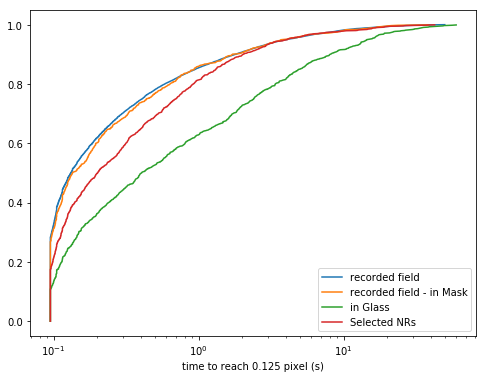

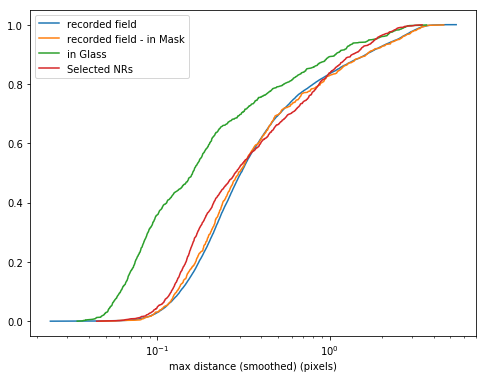

In [46]:
figure(figsize=(8,6))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
zt = abs((dgps[:,3]-dgps[:,5])/s1)
#zt = 1.0*ampst[:,0]/ampst[:,1]
yt = 1.0*Dep[:,0]
xt = sqrt(tmark[:,2]*1.0)
xt = tmark[:,5]*1.0*10e-3#/tmark[:,7]*1.0
sel = (xt>0)*(yt>0)*(abs(zt)<20)*(abs(zt)>3)

d = xt[sel]
d.sort()
plot(d,arange(len(d))/len(d),label = 'recorded field')

xt = xt[sel]
d = xt[imsk[idx0[sel]] == 1]
d.sort()
plot(d,arange(len(d))/len(d),label = 'recorded field - in Mask')

s1 = column_stack((Gdgps[:,6],Gdgps[:,4])).max(axis=1)
zt = abs((Gdgps[:,3]-Gdgps[:,5])/s1)
#zt = 1.0*ampst[:,0]/ampst[:,1]
yt = 1.0*GDep[:,0]
xt = sqrt(Gtmark[:,2]*1.0)
xt = Gtmark[:,5]*1.0*10e-3#/Gtmark[:,7]
sel = (xt>0)*(yt>0)*(abs(zt)<20)*(abs(zt)>3)

d = xt[sel]
d.sort()
plot(d,arange(len(d))/len(d),label='in Glass')

xt = 1.0*Stmark[:,5]*1.0*10e-3

d = xt
d.sort()
plot(d,arange(len(d))/len(d),label='Selected NRs')


xscale("log")
legend()
xlabel("time to reach 0.125 pixel (s)")
savefig("Disttm0.png")
figure(figsize=(8,6))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
zt = abs((dgps[:,3]-dgps[:,5])/s1)
#zt = 1.0*ampst[:,0]/ampst[:,1]
yt = 1.0*Dep[:,1]
xt = sqrt(tmark[:,2]*1.0)
#xt = tmark[:,1]*1.0
sel = (xt>0)*(yt>0)*(abs(zt)<20)*(abs(zt)>3)

d = xt[sel]
d.sort()
plot(d,arange(len(d))/len(d),label = 'recorded field')

xt = xt[sel]
d = xt[imsk[idx0[sel]] == 1]
d.sort()
plot(d,arange(len(d))/len(d),label = 'recorded field - in Mask')

s1 = column_stack((Gdgps[:,6],Gdgps[:,4])).max(axis=1)
zt = abs((Gdgps[:,3]-Gdgps[:,5])/s1)
#zt = 1.0*ampst[:,0]/ampst[:,1]
yt = 1.0*GDep[:,1]
xt = sqrt(Gtmark[:,2]*1.0)
#xt = Gtmark[:,1]*1.0
sel = (xt>0)*(yt>0)*(abs(zt)<20)*(abs(zt)>3)

d = xt[sel]
d.sort()
plot(d,arange(len(d))/len(d),label='in Glass')


xt = sqrt(Stmark[:,2]*1.0)

d = xt
d.sort()
plot(d,arange(len(d))/len(d),label='Selected NRs')


xscale("log")
legend()
xlabel("max distance (smoothed) (pixels)")
savefig("Disttm1.png")


In [19]:
imsk[idx0[sel]].shape,sel.sum()

((14855,), 14855)

Text(0.5,0,'')

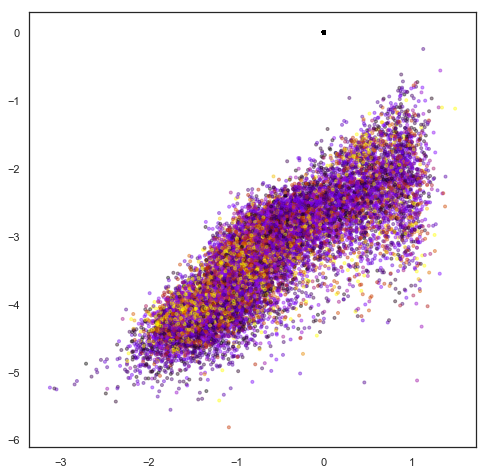

In [193]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
zt = abs((dgps[:,3]-dgps[:,5])/s1)
#zt = 1.0*ampst[:,0]/ampst[:,1]
yt = 1.0*Dep[:,0]
xt = sqrt(tmark[:,2]*1.0)
xt = tmark[:,1]*1.0
sel = (xt>0)*(yt>0)*(abs(zt)<20)*(abs(zt)>3)
xt[~sel] = 0
yt[~sel] = 0
zt[~sel] = 0

xt[sel] = log10(xt[sel])
yt[sel] = log10(yt[sel]) #log10(yt[sel])
#zt[sel] = log10(zt[sel])
zt[sel] = clip(zt[sel],3,7)-3
#g = sns.jointplot(x=xt, y=yt, kind='kde')

#g.ax_joint.set_xlim([-6.5,0])
#g.ax_joint.set_xlabel("log10($D_2$)",fontsize=14)
#g.ax_joint.set_ylabel("2G Distance",fontsize=14)


sel = isfinite(ampst[:,2])#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)


#g.x = xt[sel]
#g.y = yt[sel]
#g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)
figure(figsize=(8,8))
#plot(xt[sel],yt[sel],'C1.',markersize=12, alpha=0.2)
#scatter(zt[sel],xt[sel],c=log(yt[sel])/max(log(yt)),cmap=cmapgnu, alpha=0.4)
scatter(xt[sel],yt[sel],c=zt[sel]/max(zt[sel]),cmap=cmapgnu, alpha=0.4,marker='.')

#plot(xt[imsk[idx0[sel]] ==1],yt[imsk[idx0[sel]] ==1],'C3.', markersize=12,alpha=0.3)
xlabel("")
#g.x =  xt[imsk[idx0[sel]] ==1]
#g.y = yt[imsk[idx0[sel]] ==1]
#g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)

(array([75875.,  2791.,  2050.,  1486.,  1073.,   845.,   679.,   541.,
          395.,  1130.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

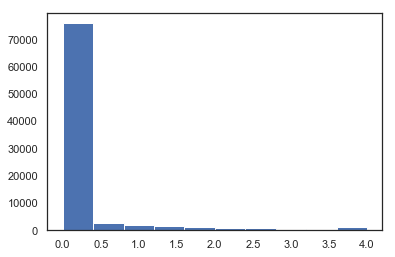

In [194]:
hist(zt[sel])

In [183]:
scatter?

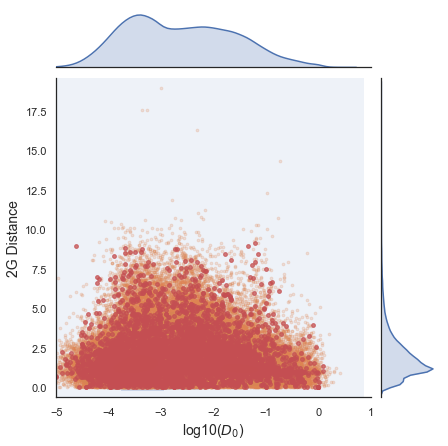

In [196]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt = abs((dgps[:,3]-dgps[:,5])/s1)
#yt = 1.0*ampst[:,2]
xt = 1.0*Des[:,0]
xt2 = 1.0*Des[:,2]

sel = (xt>0)*(abs(yt)<20)
xt[~sel] = 0
xt2[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
xt2[sel] = log10(xt2[sel])
yt[sel] = yt[sel] #log10(yt[sel])


g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("2G Distance",fontsize=14)

sel = isfinite(ampst[:,2])#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

g.x =  xt[imsk[idx0[sel]] ==1]
g.y = yt[imsk[idx0[sel]] ==1]
g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)


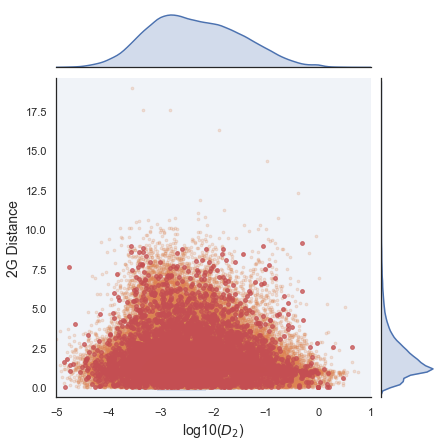

In [199]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt = abs((dgps[:,3]-dgps[:,5])/s1)
#yt = 1.0*ampst[:,2]
xt2 = 1.0*Des[:,0]
xt = 1.0*Des[:,2]

sel = (xt>0)*(abs(yt)<20)
xt[~sel] = 0
xt2[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
xt2[sel] = log10(xt2[sel])
yt[sel] = yt[sel] #log10(yt[sel])


g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_2$)",fontsize=14)
g.ax_joint.set_ylabel("2G Distance",fontsize=14)

sel = isfinite(ampst[:,2])#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

g.x =  xt[imsk[idx0[sel]] ==1]
g.y = yt[imsk[idx0[sel]] ==1]
g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)


-2.4595106227734207


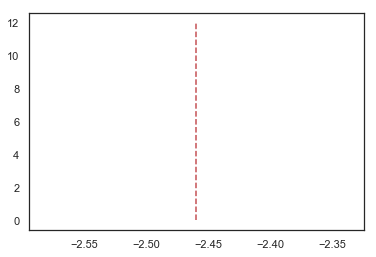

In [200]:
newsel = (yt>3.0)
newsel1 = (yt>3.0)*(imsk[idx0] ==1)
plot([mean(xt[newsel]),mean(xt[newsel])],[0,12],'r--')
print(mean(xt[newsel]))

0.6645021645021645 0.6711544934365533


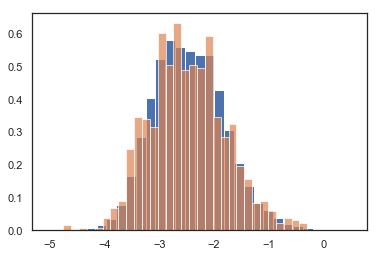

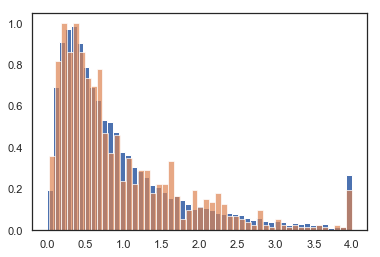

In [203]:
hist(xt[newsel],31,density=True)
hist(xt[newsel1],31,density=True,alpha=0.7)
figure()
ratio = 10**(xt2[newsel])/10**(xt[newsel])
ratioiC =10**(xt2[newsel1])/10**(xt[newsel1]) 
hist(clip(ratio,0,4),51,density=True)
hist(clip(ratioiC,0,4),51,density=True,alpha=0.7)
print(sum(ratioiC<1.0)/newsel1.sum(),sum(ratio<1.0)/newsel.sum())

In [208]:
mean(ratio),mean(ratioiC),exp(mean(log(ratio))),exp(mean(log(ratioiC)))

(0.9964668662754658,
 0.9625192617582945,
 0.6522900239185982,
 0.6443568852159011)

In [ ]:
mean(ratio),mean(ratioiC)

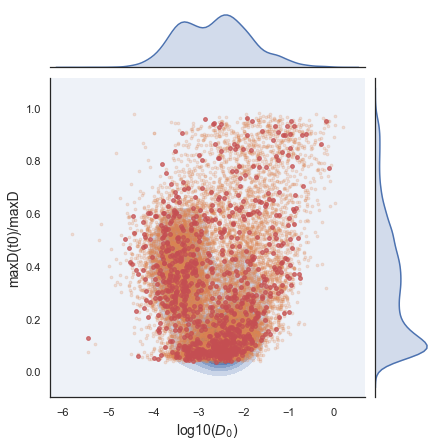

In [258]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt2 = abs((dgps[:,3]-dgps[:,5])/s1)
yt = 1.0*sqrt(tmark[:,2]/tmark[:,0])

#yt = 1.0*ampst[:,2]
#xt2 = 1.0*Des[:,0]
xt = 1.0*Des[:,0]#/Des[:,2]

sel = (xt>0)*(abs(yt2)>3.0)*(abs(yt2)<20)#*(abs(yt)<20)*(abs(yt)>3.0)
xt[~sel] = 0
xt2[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
#xt2[sel] = log10(xt2[sel])
#yt[sel] = log10(yt[sel])


g = sns.jointplot(x=xt[sel], y=yt[sel], kind='kde')

#tg.ax_joint.set_xlim([-5,1])
#g.ax_joint.set_xlabel("log10($D_2$)",fontsize=14)
#g.ax_joint.set_ylabel("2G Distance",fontsize=14)
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("maxD(t0)/maxD",fontsize=14)


#sel = isfinite(ampst[:,2])#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)
xt = xt[sel]
yt = yt[sel]
g.x =  xt[imsk[idx0[sel]] ==1]
g.y = yt[imsk[idx0[sel]] ==1]
g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)


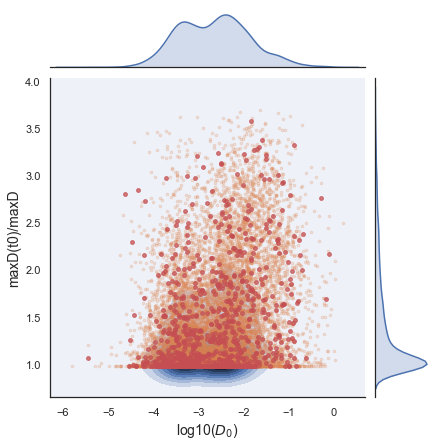

In [264]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt2 = abs((dgps[:,3]-dgps[:,5])/s1)
yt = 1.0*sqrt(tmark[:,3]/tmark[:,0])
yt = log10(1.0*tmark[:,5])

#yt = 1.0*ampst[:,2]
#xt2 = 1.0*Des[:,0]
xt = 1.0*Des[:,0]#/Des[:,2]

sel = (xt>0)*(abs(yt2)>3.0)*(abs(yt2)<20)*isfinite(yt)#*(abs(yt)<20)*(abs(yt)>3.0)
xt[~sel] = 0
xt2[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
#xt2[sel] = log10(xt2[sel])
#yt[sel] = log10(yt[sel])


g = sns.jointplot(x=xt[sel], y=yt[sel], kind='kde')

#tg.ax_joint.set_xlim([-5,1])
#g.ax_joint.set_xlabel("log10($D_2$)",fontsize=14)
#g.ax_joint.set_ylabel("2G Distance",fontsize=14)
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("maxD(t0)/maxD",fontsize=14)


#sel = isfinite(ampst[:,2])#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)
xt = xt[sel]
yt = yt[sel]
g.x =  xt[imsk[idx0[sel]] ==1]
g.y = yt[imsk[idx0[sel]] ==1]
g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)


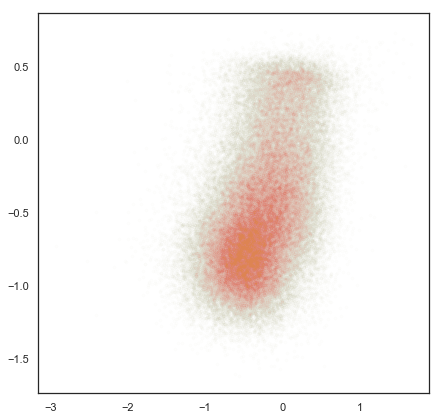

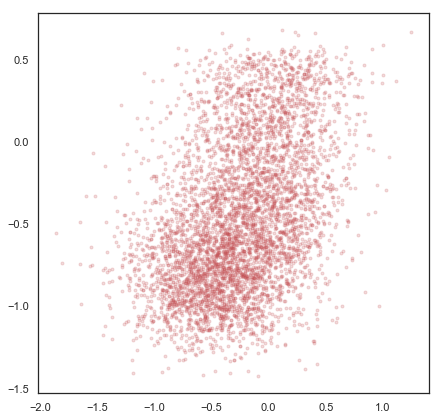

In [239]:
figure(figsize=(7,7))
plot(xt,yt,'C1.',alpha=0.008)
figure(figsize=(7,7))
plot(xt[imsk[idx0[sel]] ==1],yt[imsk[idx0[sel]] ==1],'C3.',alpha=0.2)

In [220]:
sel.sum()

14855